In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
import datetime as dt
import os

### 가설 수립
1. $H_0$ : KOSPI200의 주식의 평균 수익률이 0이하이다.
2. $H_1$ : KOSPI200사의 주식의 평균 수익률이 0이상이다.

### read_csv() : csv 파일을 dataframe으로 불러오기

In [61]:
def read_csv(path,code):
    file_list=os.listdir(path)
    for i in file_list:
        if code in i:
            print('opened  :',i)
            return pd.read_csv(os.path.join(path,i))

### read_KS200_symbol() : csv파일에서 KOSPI200 종목 리스트 반환하기

In [62]:
def read_KS200_symbol(path,name):
    temp_for_sort = []
    file_path = os.path.join(path, name)
    data_list=[]
    with open(file_path, 'r', encoding='ms949') as in_file:
        for sort_line in in_file:
            sort_line=sort_line.strip('\n')
            data=sort_line.split(',')
            data_list.append(data)

    return data_list

### csv 파일 불러오기

In [60]:
data_path = './data'
KS200_name = 'KOSPI200.csv'
KS200_list=read_KS200_symbol(data_path,KS200_name)
print(len(KS200_list))
df = read_csv(data_path, KS200_list[1][0])

201
opened  : SK하이닉스000660_2015-01-01_2019-01-26.csv


### datetime으로 Date 속성변환

In [68]:
df['Date'] = pd.to_datetime(df['Date'])

### Date 열을 index로 지정

In [69]:
df.set_index('Date',inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2015-01-02 to 2019-01-25
Data columns (total 6 columns):
Open      999 non-null int64
High      999 non-null int64
Low       999 non-null int64
Close     999 non-null int64
Volume    999 non-null int64
Change    999 non-null float64
dtypes: float64(1), int64(5)
memory usage: 54.6 KB


### index 확인

In [73]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [75]:
df.head(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,47950,48400,47650,47750,1155944,0.000000
2015-01-05,48050,48400,47500,47650,1409146,-0.002094
2015-01-06,47000,47600,46900,47500,1661196,-0.003148
2015-01-07,46700,47600,46700,47400,1821266,-0.002105
2015-01-08,48250,50000,47900,49950,5006675,0.053797


### 시작지점과 끝지점 지정

In [78]:
start = '20150102'
end = '20180601'

In [82]:
KSFT=df[start:end]

In [83]:
KSFT.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,47950,48400,47650,47750,1155944,0.000000
2015-01-05,48050,48400,47500,47650,1409146,-0.002094
2015-01-06,47000,47600,46900,47500,1661196,-0.003148
2015-01-07,46700,47600,46700,47400,1821266,-0.002105
2015-01-08,48250,50000,47900,49950,5006675,0.053797
2015-01-09,50700,51400,49700,49700,3313929,-0.005005
2015-01-12,50000,50500,49450,50300,1709997,0.012072
2015-01-13,48500,49650,48500,49000,3047952,-0.025845
2015-01-14,48900,49850,48850,48900,2241954,-0.002041


날짜별 수익률을 구한다.

In [84]:
price = KSFT['Close']
returns = price.pct_change()[1:]

In [99]:
returns

Date
2015-01-05   -0.002094
2015-01-06   -0.003148
2015-01-07   -0.002105
2015-01-08    0.053797
2015-01-09   -0.005005
2015-01-12    0.012072
2015-01-13   -0.025845
2015-01-14   -0.002041
2015-01-15    0.012270
2015-01-16   -0.041414
2015-01-19   -0.009484
2015-01-20    0.001064
2015-01-21    0.021254
2015-01-22   -0.021852
2015-01-23    0.010638
2015-01-26    0.015789
2015-01-27    0.018653
2015-01-28    0.001017
2015-01-29   -0.036585
2015-01-30    0.005274
2015-02-02   -0.022036
2015-02-03    0.002146
2015-02-04    0.012848
2015-02-05   -0.003171
2015-02-06   -0.034995
2015-02-09   -0.006593
2015-02-10   -0.001106
2015-02-11    0.037652
2015-02-12   -0.004269
2015-02-13    0.008574
                ...   
2018-04-18    0.021739
2018-04-19    0.039007
2018-04-20   -0.039818
2018-04-23    0.000000
2018-04-24   -0.027251
2018-04-25    0.003654
2018-04-26    0.049757
2018-04-27    0.006936
2018-04-30   -0.029851
2018-05-02   -0.016568
2018-05-03   -0.002407
2018-05-04    0.001206
2018-0

In [85]:
price

Date
2015-01-02    47750
2015-01-05    47650
2015-01-06    47500
2015-01-07    47400
2015-01-08    49950
2015-01-09    49700
2015-01-12    50300
2015-01-13    49000
2015-01-14    48900
2015-01-15    49500
2015-01-16    47450
2015-01-19    47000
2015-01-20    47050
2015-01-21    48050
2015-01-22    47000
2015-01-23    47500
2015-01-26    48250
2015-01-27    49150
2015-01-28    49200
2015-01-29    47400
2015-01-30    47650
2015-02-02    46600
2015-02-03    46700
2015-02-04    47300
2015-02-05    47150
2015-02-06    45500
2015-02-09    45200
2015-02-10    45150
2015-02-11    46850
2015-02-12    46650
              ...  
2018-04-18    84600
2018-04-19    87900
2018-04-20    84400
2018-04-23    84400
2018-04-24    82100
2018-04-25    82400
2018-04-26    86500
2018-04-27    87100
2018-04-30    84500
2018-05-02    83100
2018-05-03    82900
2018-05-04    83000
2018-05-08    83500
2018-05-09    83400
2018-05-10    85800
2018-05-11    86100
2018-05-14    85400
2018-05-15    84600
2018-05-16    8

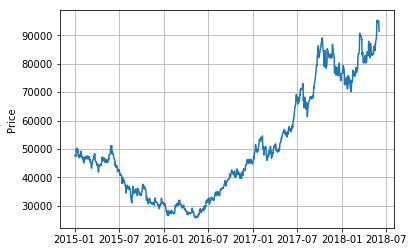

In [87]:
plt.plot(price)
plt.grid()
plt.ylabel('Price')
plt.show()

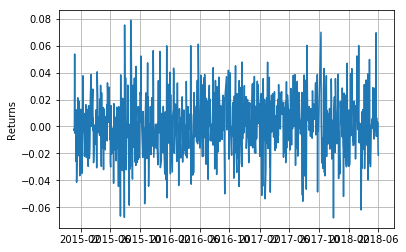

In [88]:
plt.plot(returns)
plt.grid()
plt.ylabel('Returns')
plt.show()

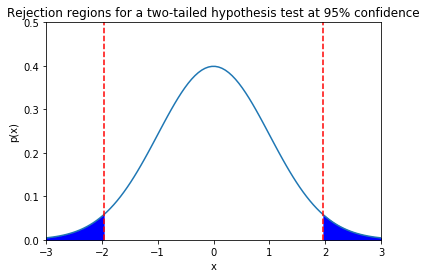

In [89]:
x = np.linspace(-3,3,100)
norm_pdf = lambda x : (1/np.sqrt(2*np.pi))* np.exp(-x * x / 2 )
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x > 1.96, color='blue')
ax.fill_between(x, 0, y, where = x < -1.96, color='blue')
plt.plot([1.96,1.96],[0,0.5], 'r--')
plt.plot([-1.96,-1.96],[0,0.5], 'r--')
plt.title('Rejection regions for a two-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim(-3,3)
plt.ylim(0,0.5)
plt.show()

수익률의 통계량 계산

In [90]:
n = len(returns)
test_statistic = ((returns.mean() - 0) /
                (returns.std()/np.sqrt(n-1)))
print ('t test statistic: ', test_statistic)

t test statistic:  1.3373448720489094


In [97]:
from scipy.stats import norm
p_val = (1 - norm.cdf(test_statistic,0,1))
print('P-value is: ', p_val)

P-value is:  0.0905550451347017


P-value가 0.05보다 크면, $H_0$를 기각할 수 없다.

P-value가 0.05보다 작거나 같으면, $H_0$를 기각할 수 있다.

## 두 집단의 평균 비교
해당 회사의 주식의 평균 수익률이 시장의 평균 수익률이 다른지 검증

### 가설 수립
1. $H_0$ : 해당 사의 주식의 평균 수익률에서 시장의 평균 수익률을 뺀 값이 0이다.
2. $H_1$ : 해당 사의 주식의 평균 수익률에서 시장의 평균 수익률을 뺀 값은 0이 아니다.

데이터 불러오기 & 수익률 계산

In [137]:
KS200_jisu_name = 'KS200_jisu.csv'
KS200_jisu = read_csv(data_path,KS200_jisu_name)

opened  : KS200_jisu.csv


[('068270', '셀트리온', 0.004444364966465275), ('207940', '삼성바이오로직스', 0.010749076001136615), ('128940', '한미약품', 0.01952640451869525), ('008930', '한미사이언스', 0.02435948450685177), ('096770', 'SK이노베이션', 0.04267690741619845), ('009150', '삼성전기', 0.04356475253752601), ('069620', '대웅제약', 0.047869305443164145)]


In [138]:
seltrion = read_csv(data_path,'068270')
seltrion.head(5)

opened  : 셀트리온068270_2015-01-01_2019-01-26.csv


,Date,Open,High,Low,Close,Volume,Change
0,2015-01-02,35438,35848,35258,35532,209680,0.007714
1,2015-01-05,35395,35576,35077,35350,168975,-0.005122
2,2015-01-06,34941,35121,34396,34715,271199,-0.017963
3,2015-01-07,34578,34805,34396,34397,169967,-0.009160
4,2015-01-08,34622,35213,34395,34579,225169,0.005291


In [139]:
KS200_jisu['Date'] = pd.to_datetime(KS200_jisu['Date'])
KS200_jisu.set_index('Date',inplace=True)

seltrion['Date'] = pd.to_datetime(seltrion['Date'])
seltrion.set_index('Date',inplace=True)

start = '20150102'
end = '20180601'

KSFT = KS200_jisu[start:end]
SELFT = seltrion[start:end]

In [140]:
KSFT.head(5)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,244.79,243.96,245.32,243.25,54150.0,0.0030
2015-01-05,244.26,243.83,244.56,241.76,62850.0,-0.0022
2015-01-06,239.93,241.36,242.06,239.32,66250.0,-0.0177
2015-01-07,240.53,239.41,240.91,239.09,54600.0,0.0025
2015-01-08,243.94,242.28,244.13,241.68,64020.0,0.0142


In [141]:
print(KSFT.shape[0])

840


In [142]:
SELFT.head(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,35438,35848,35258,35532,209680,0.007714
2015-01-05,35395,35576,35077,35350,168975,-0.005122
2015-01-06,34941,35121,34396,34715,271199,-0.017963
2015-01-07,34578,34805,34396,34397,169967,-0.009160
2015-01-08,34622,35213,34395,34579,225169,0.005291


In [143]:
print(SELFT.shape[0])

840


In [146]:
KS200_jisu_price = KSFT['Close']
seltrion_price = SELFT['Close']
KS200_jisu_returns = KS200_jisu_price.pct_change()[1:]
seltrion_returns = seltrion_price.pct_change()[1:]

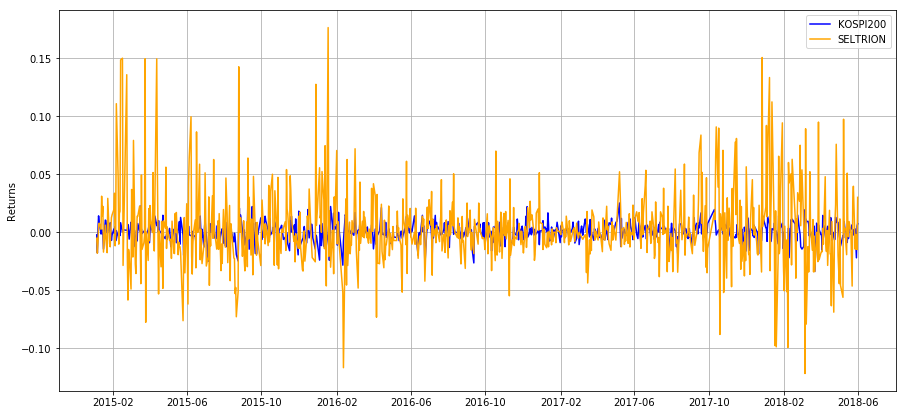

In [147]:
plt.figure(1, figsize = (15, 7))
plt.plot(KS200_jisu_returns,label='KOSPI200', color = 'blue')
plt.plot(seltrion_returns,label='SELTRION', color = 'orange')
plt.grid()
plt.ylabel('Returns')
plt.legend()
plt.show()

In [150]:
mu_KS200 = KS200_jisu_returns.mean()
mu_seltrion = seltrion_returns.mean()
s_KS200 = KS200_jisu_returns.std()
s_seltrion = seltrion_returns.std()

n_KS200 = len(KS200_jisu_returns)
n_seltrion = len(seltrion_returns)

test_statistic = ((mu_seltrion - mu_KS200) - 0)/((s_KS200**2/n_KS200) + (s_seltrion**2/n_seltrion))**0.5
df = ((s_KS200**2/n_KS200) + (s_seltrion**2/n_seltrion))**2/(((s_KS200**2 / n_KS200)**2 /n_KS200)+((s_seltrion**2 / n_seltrion)**2/n_seltrion))

print('t test statistic: ', test_statistic)
print('Degrees of freedom (modified): ', df)

t test statistic:  2.2608362221593956
Degrees of freedom (modified):  938.272457914015


In [155]:
from scipy.stats import norm
p_val = (1 - norm.cdf(test_statistic,0,1))
print('P-value is: ', p_val)

P-value is:  0.01188470033733291


자유도가 매우 높을 때(>30)의 t-distribution은 정규분포에 근사하므로, 신뢰도 95% 구간은 [-1.96,1.96]이다. 따라서, 귀무가설을 기각할 수 있다.(셀트리온)

### 실험의 반복

$H_0$를 기각했을 때, 실제로 $H_0$인 경우를 제 1종 오류(Type 1 error)라고 한다. Type 1 error의 확률은 유의수준(siginificant level)과 같다. 실제로 Type 1 error가 나올 확률이 유의 수준과 같은지 확인해 보자.

In [153]:
df = pd.DataFrame()
T = 20
N = 100

for i in range(T):
    X = stats.norm.rvs(0, 1, N)
    name = 'X{}'.format(i)
    df[name] = X

In [154]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,0.584382,1.575696,2.695464,-0.093382,-1.008653,-2.130520,0.073951,0.511067,-0.393583,0.928494,-0.684658,0.808830,-0.970583,1.288700,-1.530880,-0.360343,0.613435,-1.420724,-0.468166,0.940244
1,0.270102,-0.054586,-0.850597,-0.686511,0.220699,1.324185,-1.555102,0.149774,-1.554309,-1.199953,-0.721713,-0.598281,0.252950,1.031579,1.169922,0.322423,-0.139039,-1.149716,-1.564601,0.834027
2,-0.247707,0.863195,-1.095371,1.167344,0.598390,-0.166306,-0.026893,1.922100,0.508699,0.024421,0.192007,-0.844108,-0.004417,0.712102,-0.808716,-1.603634,1.146348,0.094556,-1.365530,-0.528136
3,2.020952,-0.686447,-1.460047,-0.018267,0.652201,-0.049083,0.652234,-0.003813,-0.213485,-0.947249,0.224737,-0.921354,0.452828,1.140943,1.029152,0.492711,-0.437527,-1.136060,1.440852,0.921749
4,-2.151903,-1.676381,1.978479,0.994064,-0.504806,-0.606645,1.629224,-0.872791,0.825461,1.898365,0.683799,-0.067565,0.431572,0.218596,0.830026,-0.182794,0.486983,0.761405,0.450945,-0.305205


In [159]:
from scipy.stats import t

In [160]:
cutoff = 0.05
TypeIerror=0
for i in range(T):
    Xi = df.iloc[:, i]
    test_statistic = ((Xi.mean() - 0) /
                (Xi.std()/np.sqrt(N-1)))
    pvalue = (1 - t.cdf(test_statistic, N - 1))
    if pvalue < cutoff:
        TypeIerror += 1

In [161]:
TypeIerror

1

In [162]:
len(Xi)

100

횟수를 좀 더 늘려서 시도하기 위해 함수 정의

N개의 데이터 샘플을 이용한 가설 검정을 T번 시행하고, 각 시행에 대한 p-value를 반환하는 함수

In [163]:
def do_experiment(N, T, cutoff=0.05):
    results=[]
    
    # Make random data
    for i in range(T):
        X = stats.norm.rvs(0, 1, N)
        test_statistic = ((X.mean() - 0) /(X.std()/np.sqrt(N-1)))
        pvalue = (1 - t.cdf(test_statistic, N - 1))
        results.append(pvalue)
    return results

P-value 자체도 하나의 확률 변수로 볼 수 있다. 실제로 P-value는 [0,1]사이에서 균등하게 분포 되어있다.

/Users/donghoon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


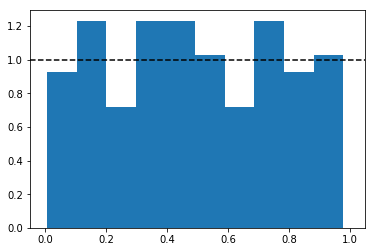

In [165]:
N=10
T=100
p_values = do_experiment(N,T,cutoff=0.05)
plt.hist(p_values,normed=True)
plt.plot((-0.05,1.05), (1,1), 'k--')
plt.xlim(-0.05,1.05)
plt.show()

/Users/donghoon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


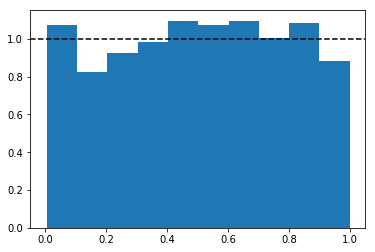

In [166]:
N=10
T=1000
p_values = do_experiment(N,T,cutoff=0.05)
plt.hist(p_values,normed=True)
plt.plot((-0.05,1.05), (1,1), 'k--')
plt.xlim(-0.05,1.05)
plt.show()